In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [68]:
data=np.loadtxt('/home/yanhua/iris-pca.txt')
print (data.shape)
pca1= data[:,0].reshape(100,1)
pca2= data[:,1].reshape(100,1)
label=data[:,2].reshape(100,1)
pca= data[:,0:2]
print (pca)


(100, 3)
[[-1.1003e+00 -8.6020e-01]
 [-7.3000e-01 -5.9660e-01]
 [-1.2380e+00 -6.1280e-01]
 [-3.9600e-01  1.7523e+00]
 [-1.0690e+00  2.1110e-01]
 [-3.8320e-01  5.8910e-01]
 [-7.4620e-01 -7.7610e-01]
 [ 4.9620e-01  1.8427e+00]
 [-9.2310e-01 -3.0200e-02]
 [-5.0000e-03  1.0260e+00]
 [ 1.2430e-01  2.6492e+00]
 [-4.3730e-01  5.8700e-02]
 [-5.4980e-01  1.7667e+00]
 [-7.1480e-01  1.8480e-01]
 [ 3.7100e-02  4.3140e-01]
 [-8.7300e-01 -5.0830e-01]
 [-3.4680e-01  1.9000e-01]
 [-1.5290e-01  7.8810e-01]
 [-1.2112e+00  1.6279e+00]
 [-1.5640e-01  1.2988e+00]
 [-7.3580e-01 -4.0110e-01]
 [-4.7080e-01  4.1520e-01]
 [-1.2239e+00  9.3780e-01]
 [-6.2730e-01  4.1540e-01]
 [-6.9810e-01  6.3300e-02]
 [-8.7060e-01 -2.4990e-01]
 [-1.2500e+00  8.2300e-02]
 [-1.3537e+00 -3.2770e-01]
 [-6.5990e-01  2.2360e-01]
 [ 4.7100e-02  1.0537e+00]
 [-1.2110e-01  1.5584e+00]
 [-1.4100e-02  1.5681e+00]
 [-2.3520e-01  7.7330e-01]
 [-1.0532e+00  6.3480e-01]
 [-2.2070e-01  2.7990e-01]
 [-4.3030e-01 -8.5230e-01]
 [-1.0459e+00 -5.20

In [34]:
print (np.where(label==0))
print (pca1[-50:].shape)
print (pca1[50:].shape)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0]))
(50, 1)
(50, 1)


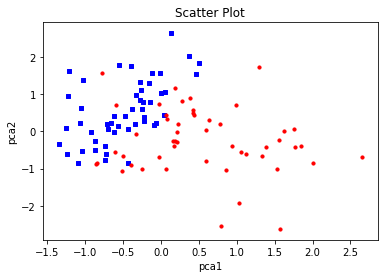

In [56]:
fig = plt.figure()  
ax1 = fig.add_subplot(111)  
#设置标题  
ax1.set_title('Scatter Plot')  
#设置X轴标签  
plt.xlabel('pca1')  
#设置Y轴标签  
plt.ylabel('pca2')  
#画散点图  

ax1.scatter(pca1[:50], pca2[:50], s=10, c='b', marker="s", label='Setosa')

ax1.scatter(pca1[-50:],pca2[-50:], s=10, c='r', marker="o", label='Virginica')

#显示所画的图  
plt.show() 

In [69]:
from sklearn import svm

In [70]:
model = svm.SVC(kernel='linear')
model.fit(pca, label)

/home/yanhua/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [85]:

# Get the separating hyperplane# Get th 
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-1.5, 3)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])


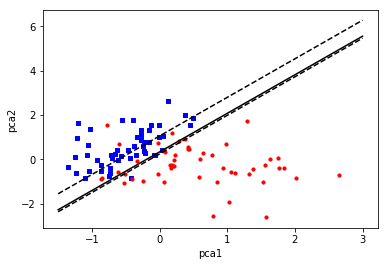

In [87]:
fig = plt.figure()  
ax1 = fig.add_subplot(111) 
plt.xlabel('pca1')  
plt.ylabel('pca2')  

ax1.scatter(pca1[:50], pca2[:50], s=10, c='b', marker="s", label='Setosa')

ax1.scatter(pca1[-50:],pca2[-50:], s=10, c='r', marker="o", label='Virginica')
plt.plot(xx, yy, linewidth=1.5, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.show()